# Topic Modeling with SVD and NMF

I just follow along the [FastAI NLP](https://www.fast.ai/2019/07/08/fastai-nlp/) course on youtube. The repo with the original notebooks is [here](https://github.com/fastai/course-nlp). This notebook is based on the first three videos of the [youtube playlist](https://www.youtube.com/playlist?list=PLtmWHNX-gukKocXQOkQjuVxglSDYWsSh9).

## Dataset

In this notebook we use the newsgroups dataset that is available as part of the sklearn package. There are quite a few very useful utility methods that ship with the dataset allowing us to generate train and validation sets. We really won't need the training and testing datasets, but we'll generate them for illustration.

In [4]:
categories = ['comp.sys.mac.hardware', 'rec.autos', 'sci.electronics', 'misc.forsale']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [5]:
print("\n".join(newsgroups_train.data[:3]))

One way ticket (return leg of roundtrip ticket) for female traveler



San Francisco ==> St. Louis ==> Philadelphia


May 21, 1993 (Friday)  leaves SFO     10:25 am
                       arrives Phila.  8:43 pm



.............$150   or best offer



G'day people,
	
	Are there any MR2 owners or motor-head gurus out there, that know why
my MR2's engine sounds noisy? The MR2's engine is noisy at the best of times, 
but not even a nice nose - it's one of those very ugly noises. 
	I do an oil change every 2-3 months, and for about 2 months the engine
noise sounds relatively quiet during driving and idling. At around the 3 month
mark, after an oil change (I've been tracking this very thoroughly for months
now) it starts to get that very disgusting noise, not so much during driving,
but more so during idling. 
	What's its problem? 
	Also.. I don't know if it's just me, but if noticed a little
performance drop. It just hasn't got the acceleration it used to. 

	Any help/tips would be appreci

In [9]:
newsgroups_train.target[:3]

array([1, 2, 1])

## Stemming and Lemmatization

Stemming and Lemmatization are methods adopted to reduce the complexity of the model. They achieve this by reducing the total number of words to consider by trying to map all the words in the dataset to its root words. The algorithms are quite flawed and approximate (as we will see in the examples). Nevertheless, there are many advantages to using these methods. Lemmatisation is the fancier algorithm. Stemming can be referred to as a poor man's lemmatisation.

In [13]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/abishek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/abishek/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [14]:
from nltk import stem

wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [15]:
words = ['feet', 'foot', 'foots', 'footing']

[wnl.lemmatize(word) for word in words]

['foot', 'foot', 'foot', 'footing']

In [16]:
[porter.stem(word) for word in words]

['feet', 'foot', 'foot', 'foot']

In [18]:
word_lists = [
    ['fly', 'flies', 'flying'],
    ['organize', 'organizes', 'organizing'],
    ['universe', 'university']
]

print([[wnl.lemmatize(word) for word in wordlist] for wordlist in word_lists])
print([[porter.stem(word) for word in wordlist] for wordlist in word_lists])

[['fly', 'fly', 'flying'], ['organize', 'organizes', 'organizing'], ['universe', 'university']]
[['fli', 'fli', 'fli'], ['organ', 'organ', 'organ'], ['univers', 'univers']]


In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [26]:
#FIXME: this doesn't work. 
nlp.remove_pipe("lemmatizer")
nlp.add_pipe("lemmatizer", config={"mode": "lookup"})
lemmatizer = nlp.get_pipe("lemmatizer")
[lemmatizer.lookup(word) for word in words]

lookup


AttributeError: 'EnglishLemmatizer' object has no attribute 'lookup'

## Stop Words

Stop words is another traditional NLP technique to reduce model complexity. In most modern environment, stop word removal is discouraged because we actually lose data when we do this. But in resource constrained environment, this is still a useful technique. There is no standard universal stop word list and is very very implementation specific too. We'll this with both spacy and sklearn's stop word list.

In [28]:
spacy_stop_words = nlp.Defaults.stop_words

In [31]:
from sklearn.feature_extraction import _stop_words as sklearn_stop_words

sklearn_stop_words.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [32]:
spacy_stop_words - sklearn_stop_words.ENGLISH_STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'ca',
 'did',
 'does',
 'doing',
 'just',
 'make',
 "n't",
 'n‘t',
 'n’t',
 'quite',
 'really',
 'regarding',
 'say',
 'unless',
 'used',
 'using',
 'various',
 '‘d',
 '‘ll',
 '‘m',
 '‘re',
 '‘s',
 '‘ve',
 '’d',
 '’ll',
 '’m',
 '’re',
 '’s',
 '’ve'}

In [33]:
sklearn_stop_words.ENGLISH_STOP_WORDS - spacy_stop_words

frozenset({'amoungst',
           'bill',
           'cant',
           'co',
           'con',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'eg',
           'etc',
           'fill',
           'find',
           'fire',
           'found',
           'hasnt',
           'ie',
           'inc',
           'interest',
           'ltd',
           'mill',
           'sincere',
           'system',
           'thick',
           'thin',
           'un'})

## Topic Modeling

Topic Modeling is an unsupervised learning problem, actually, where we try to cluster the dataset to see what topics emerge. Here we are using the topics we chose to filter the dataset and then run SVD style decomposition to understand if the realised components actually fall under the topics we originally chose. That was a complicated sentence, but the overall thing is far simpler than what I wrote up.

To do this, though, we need the data to be vectorized into numbers. sklearn offers two good options to this: `count vectorizer` and `tfidf vectorizer`. We implement the algorithm with both these options. There is no accuracy estimate at this time because it is unsupervised. We just eyeball to check that the outputs are sensible.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data)

In [36]:
vectors.shape

(2348, 20490)

In [37]:
print(len(newsgroups_train.data))

2348


In [43]:
vocab = vectorizer.get_feature_names_out()

In [44]:
vocab.shape

(20490,)

In [45]:
vocab[8000:8020]

array(['existence', 'existing', 'exists', 'exit', 'exits', 'exitserver',
       'exotic', 'exp', 'expand', 'expandable', 'expanded', 'expander',
       'expandibility', 'expanding', 'expands', 'expansion', 'expasion',
       'expecially', 'expect', 'expected'], dtype=object)

In [47]:
%time U,s,Vh = linalg.svd(vectors.todense(), full_matrices=False)

CPU times: user 2min 11s, sys: 13.1 s, total: 2min 24s
Wall time: 39.1 s


In [48]:
U.shape, s.shape, Vh.shape

((2348, 2348), (2348,), (2348, 20490))

In [59]:
temp1 = U @ np.diag(s) @ Vh

In [63]:
# Verifies that temp1 and vectors are the same.
np.allclose(temp1, vectors.todense())

True

In [68]:
# verify U and Vh are orthonormal
unit_U = np.eye(U.shape[0])
unit_Vh = np.eye(Vh.shape[0])
print(np.allclose(np.dot(U, np.transpose(U)), unit_U))
print(np.allclose(np.dot(Vh, np.transpose(Vh)), unit_Vh))

True
True


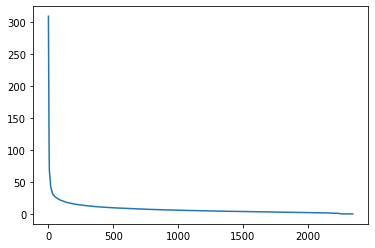

In [69]:
plt.plot(s)

The `Vh` vector is the topics vector. It is actually a matrix with each row containing significant topics for each entry in the dataset. We will limit ourselves to a few topics from each row, say 10. The below `show_topics` method extacts 10 topics from each row of the `Vh` vector and converts them back to words using the `vocab` vector.

In [72]:
num_top_words = 10
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]


In [73]:
show_topics(Vh[:10])

['drl wovy frisco ites ios tuna headline camrys aesthetic corollas',
 'wire wiring ground neutral subject circuit outlets gfci nec cable',
 '00 50 appears 40 art 10 dos 20 25 1st',
 '50 appears 40 art 10 80 wolverine 1st 70 cover',
 'wire wiring appears 40 art 32 ground bit neutral os',
 'car 40 appears brake oil 10 tires dot fluids abs',
 'oil fluids brake dot abs tires braking tire bit 32',
 'new copies price vs just like don know 10 45',
 'wiring use subject gfci cec insulation cable circuits usually power',
 'appears don 40 car just art know radar 00 rec']

In [74]:
m,n = vectors.shape
d = 10 # num topics

In [75]:
clf = decomposition.NMF(n_components=d, random_state=42)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

/home/abishek/virtualenvs/notebooks-GQcUzVyT-py3.9/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [76]:
show_topics(H1)

['wire wiring use neutral ground subject circuit cable outlets gfci',
 '32 bit mac os scsi ibm 16 93 pc 92',
 '00 50 appears 40 art 10 wolverine 1st 80 70',
 '00 dos mpc 15 20 25 35 30 world cd',
 'car brake oil dot fluids abs tires braking cars tire',
 'good 50 excellent missing tn de7 00 geoffrey uccxkvb fair',
 'send requests request com edu list cars lists listserv mail',
 'car don just like new know radar rec drive use',
 'ground grounding conductor neutral current wire panel service run equipment',
 'copies vs 10 copy new print annual cover issue left']

In [77]:
vectorizer_2 = TfidfVectorizer(stop_words="english")
tfidf_vectors = vectorizer_2.fit_transform(newsgroups_train.data)

In [78]:
W2 = clf.fit_transform(tfidf_vectors)
H2 = clf.components_

/home/abishek/virtualenvs/notebooks-GQcUzVyT-py3.9/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/home/abishek/virtualenvs/notebooks-GQcUzVyT-py3.9/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [79]:
show_topics(H2)

['use power ground current amp output voltage good input circuit',
 '00 50 dos 20 10 15 1st cover 25 new',
 'car cars engine just like dealer good new think miles',
 'drive hard scsi disk drives internal floppy cd external cable',
 'offer sale shipping condition asking best sell email edu new',
 'b30 ingr dtmedin catbyte 205 al huntsville ssd 35894 medin',
 'card nubus video pds cards lc fpu cache slot vga',
 'thanks does know mail advance info like looking appreciated hi',
 'simms vram simm memory meg 256k need quadra ram pin',
 'apple mac problem monitor duo se keyboard time hardware quadra']

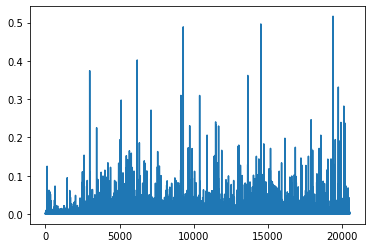

In [80]:
plt.plot(clf.components_[0])

In [81]:
clf.reconstruction_err_

46.66649095524218

In [82]:
%time u, s,v = decomposition.randomized_svd(vectors, 10)

/home/abishek/virtualenvs/notebooks-GQcUzVyT-py3.9/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


CPU times: user 538 ms, sys: 269 ms, total: 807 ms
Wall time: 293 ms


In [83]:
import fbpca

%time u1, s1, v1 = fbpca.pca(vectors, 10)

CPU times: user 116 ms, sys: 92.4 ms, total: 208 ms
Wall time: 69.9 ms


In [84]:
u1.shape, s1.shape, v1.shape, vectors.shape

((2348, 10), (10,), (10, 20490), (2348, 20490))